# Collect

## Environment

In [1]:
import os
import pandas as pd
from ftplib import FTP
import gzip
import shutil

In [2]:
# connect to host, default port
ftp = FTP('ftp.ebi.ac.uk')   
# user anonymous, passwd anonymous@                       
ftp.login()
# change into "set1_gsk" directory
ftp.cwd('/pub/databases/chembl/ChEMBLNTD/set1_gsk')               
ftp.retrlines('LIST')

-rw-r--r--    1 ftp      ftp      10902240 Nov 18  2011 chemblntd_all.sdf.gz
-rw-r--r--    1 ftp      ftp       1151947 Nov 18  2011 chemblntd_all.txt.gz
-rw-r--r--    1 ftp      ftp       5696046 Nov 18  2011 chemblntd_gsk.sdf.gz
-rw-r--r--    1 ftp      ftp        670135 Nov 18  2011 chemblntd_gsk.txt.gz


'226 Directory send OK.'

In [3]:
listing = []
ftp.retrlines("LIST", listing.append)
words = listing[1].split(None, 8)
filename = words[-1].lstrip()

In [4]:
# download the file
local_filename = os.path.join(r"C:\Projects\Cheminformatics\data", filename)
lf = open(local_filename, "wb")
ftp.retrbinary("RETR " + filename, lf.write, 8*1024)
lf.close()

ftp.quit()

'221 Goodbye.'

In [5]:
with gzip.open(local_filename, 'rb') as f_in:
    with open(local_filename[0:-3], 'wb') as f_out:
        shutil.copyfileobj(f_in, f_out)

In [6]:
df = pd.read_csv(local_filename[0:-3], sep='\t', header=(0))

In [7]:
df.shape

(26784, 19)

In [8]:
df.head()

,COMPOUND_ID,SOURCES,SYNONYMS,MW_FREEBASE,ALOGP,HBA,HBD,PSA,RTB,RO3_PASS,NUM_RO5_VIOLATIONS,MED_CHEM_FRIENDLY,PCT_IHB_3D7,PCT_INHB_DD2,PCT_INHIB_3D7_PFLDH,pXC50_3D7,PCT_INHIB_HEPG2,IFI,SMILES
0,541908,"TCMDC-135431, 641908 (CHEMBL)",NaN,528.68500,3.823,6.0,1.0,66.93,9.0,N,1.0,Y,94.0,24.0,0.0,6.09857,7.0,0.79,COc1ccc(c(c1)OC)C2CCN(CC2)CCN3CCC(CC3)NC(=O)c4...
1,538495,"TCMDC-135971, 638495 (CHEMBL)",NaN,552.08749,5.109,5.0,2.0,130.72,9.0,N,2.0,Y,100.0,60.0,3.0,6.00393,36.0,7.75,C[C@H](c1ccccc1Cl)Oc2cc(sc2C(=O)N)n3cnc4c3cc(c...
2,538533,"TCMDC-140507, 638533 (CHEMBL)",NaN,489.52990,3.712,6.0,2.0,66.85,10.0,N,0.0,Y,100.0,74.0,3.0,6.79958,16.0,2.19,COc1ccc2c(c1)c(ccn2)[C@H](CN3CCC(CC3)NCCOc4ccc...
3,538571,"TCMDC-136654, 638571 (CHEMBL)",NaN,434.38194,4.780,4.0,1.0,65.63,5.0,N,0.0,Y,91.0,4.0,0.0,5.96201,17.0,23.08,COc1ccc(cc1)N(c2nc(cs2)c3cc(ccc3Cl)Cl)C4CCNCC4...
4,538605,"TCMDC-141576, 638605 (CHEMBL)",NaN,572.59858,4.069,4.0,1.0,118.26,8.0,N,1.0,Y,99.0,95.0,0.0,6.44885,0.0,2.70,CCN1CCN(C(=O)C1=O)C(=O)NC(c2cccs2)C(=O)N(C)Cc3...


<AxesSubplot:xlabel='PCT_IHB_3D7', ylabel='pXC50_3D7'>

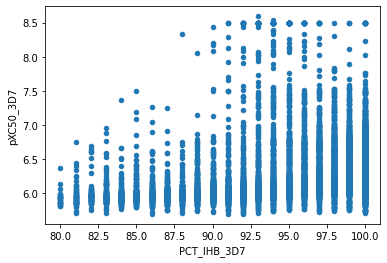

In [9]:
df.plot.scatter(x = 'PCT_IHB_3D7', y = 'pXC50_3D7')

In [10]:
df2 = df[['COMPOUND_ID', 'PCT_IHB_3D7', 'pXC50_3D7', 'SMILES']]

In [11]:
df2.shape

(26784, 4)

In [12]:
df2 = df2.dropna(axis = 0, how ='any', inplace = False)

In [13]:
print(df2.shape)
print(df2.info())

(13403, 4)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 13403 entries, 0 to 26783
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   COMPOUND_ID  13403 non-null  int64  
 1   PCT_IHB_3D7  13403 non-null  float64
 2   pXC50_3D7    13403 non-null  float64
 3   SMILES       13403 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 523.6+ KB
None


array([[<AxesSubplot:title={'center':'pXC50_3D7'}>]], dtype=object)

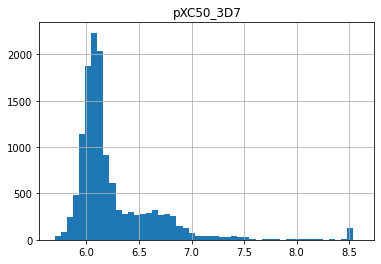

In [14]:
df2.hist(column = 'pXC50_3D7', bins = 50)

In [15]:
df2.to_csv('data/GSK_3D7.csv')